In [3]:
#importação de algumas bibliotecas necessárias para carregar e  
#tratar as imagens
import cv2 #para leituras das imagens
import os 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#img_laga = r'lagartan\lagarta1.jpg'# leitura da imagem em forma de arrey
#imglagarta = cv2.imread(img_laga)
#imglagarta = cv2.resize(imglagarta,(100, 100))#modifica o tamanho da imagem
#plt.imshow(imglagarta)
#imglagarta.shape


In [5]:
#
#for i in range(1, 100):
   # print(i)

In [6]:
#imglagarta/255

In [7]:
#os.listdir('lagartan') #lista as imagens do diretoria

In [8]:
for nome_arq in os.listdir(r'lagartapositiva'):
    imglagarta = r'lagartapositiva'+ str(nome_arq)
    #print(imglagarta)

In [9]:
for nome_arq in os.listdir('lagartapositiva'):
    imglagarta = 'lagartapositiva', nome_arq
   # print(imglagarta)

In [10]:
for nome_arq in os.listdir('lagartapositiva'):
    imglagarta = os.path.join('lagartapositiva', nome_arq)
    #print(imglagarta)

(100, 60, 60, 3)

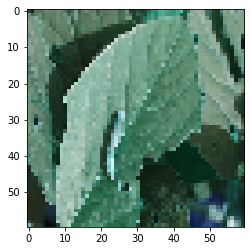

In [11]:
x = [] #carregar as imagens
y = [] 
for nome_arq in os.listdir(r'lagartapositiva'):
    imglagarta = os.path.join(r'lagartapositiva', nome_arq)
    imglagarta = cv2.imread(imglagarta)
    imglagarta = cv2.resize(imglagarta, (60, 60))
    imglagarta = imglagarta/255
    x.append(imglagarta)
    y.append(1)
    plt.imshow(imglagarta)
for nome_arq in os.listdir(r'lagartanegativa'):
    imglagarta = os.path.join(r'lagartanegativa', nome_arq)
    imglagarta = cv2.imread(imglagarta)
    imglagarta = cv2.resize(imglagarta, (60, 60))
    imglagarta = imglagarta/255
    x.append(imglagarta)
    y.append(0)
#transformando as listas em arrays
x = np.array(x)
y = np.array(y)
x[y>0].shape


In [12]:
#importar a bibliotecas para a rede neural convolucional
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Flatten, Dense

In [13]:
#estrutura da rede baseada no keras
modelo = Sequential() #construção da rede neural 
#o conv2d, camadas de convolução, chama as camadas, utilizamos o padrão de 64,
#caracteristicas, features, para o array de 3 x 3.
#Será usada a função retificadora ‘relu’ para ativação da camada 
#e o input_shape para Contar ao modelo o tamanho das imagens e o numero 
#de canais 3.
modelo.add(Conv2D(64,(3,3), activation='relu', input_shape=(60,60,3)))
#passando para o modelo o tamanho do Pool, maior numero de uma região, 
#optou-se 2 por 2, a fim de reduzir o tamanho das features, resultando na 
#primeira camada de convolução.
modelo.add(MaxPooling2D((2,2)))
#vamos adicionar mais duas camadas, uma de convolução e uma de MaxPooling
#continuamos a usar relu como função de ativação
modelo.add(Conv2D(64,(3,3), activation='relu'))
modelo.add(MaxPooling2D((2,2)))
#adicionamos mais uma camada, a flatten, achatamento, para converter o resultado,
#anterior em um vetor
#ou seja criou-se essa camada para fletar, achatar as entradas
modelo.add(Flatten())
#coneta as camadas.
#adicionamos uma camada dense, 128, que irá receber todos os os Neurons da 
#layer anterior. usou-se a função de ativação retificadora relu   
modelo.add(Dense(128, activation='relu'))
#adicionamos 1 neuronio no final, ativamos a função sigmoid para devolver
#a probabilidade de ser ou não ser o que busca-se. 
#Esse neuronio condensou todas as informações dos demais e devolve a probabilidade
modelo.add(Dense(1, activation='sigmoid'))
#a função sigmoide na camada de saída. O resultado deverá ser algo entre 0 e
#1 com um threshold  padrão de 0.5
#a saída tem 1 neurônio fazendo a predição da classe alvo 
#(é uma lagarta ou não).


In [14]:
#o compile mostrar para o modelo da rede como irá funcionar
#usamos algorítmo gradiente de descida ‘adam" (modelo matemático) 
#para fazer as derivadas, Tratar os erros, diminuir os erros.
#mostrar para o modelo qual a função de perda logarítmica que será 
#usada, neste caso binary_crossentropy e a metrica usada é a accuracy.
modelo.compile(optimizer='adam', loss='binary_crossentropy', 
               metrics=['accuracy'])

In [92]:
# agora vamos treinar a rede para identificar uma lagarta ou não
#fit para ajustar o numero de interações
modelo.fit(x, y, epochs=10)
#epochs são a quantidade de passos para percorrer
#as imagens, aqui cada imagens foi percorrida 10 vezes  


Epoch 1/10
7/7 [==============================] - 1s 113ms/step - loss: 0.9545 - accuracy: 0.5300
Epoch 2/10
7/7 [==============================] - 1s 96ms/step - loss: 0.6820 - accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 1s 94ms/step - loss: 0.6421 - accuracy: 0.6450
Epoch 4/10
7/7 [==============================] - 1s 97ms/step - loss: 0.5794 - accuracy: 0.7600
Epoch 5/10
7/7 [==============================] - 1s 97ms/step - loss: 0.6002 - accuracy: 0.6700
Epoch 6/10
7/7 [==============================] - 1s 95ms/step - loss: 0.4606 - accuracy: 0.8300
Epoch 7/10
7/7 [==============================] - 1s 96ms/step - loss: 0.3825 - accuracy: 0.8500
Epoch 8/10
7/7 [==============================] - 1s 100ms/step - loss: 0.4225 - accuracy: 0.8300
Epoch 9/10
7/7 [==============================] - 1s 99ms/step - loss: 0.2947 - accuracy: 0.9000
Epoch 10/10
7/7 [==============================] - 1s 97ms/step - loss: 0.2855 - accuracy: 0.9300


In [167]:
#Vamos carregar uma imagem para testar a rede 
imglagarta = cv2.imread('imagemteste7.jpg')
imglagarta = cv2.resize(imglagarta, (60,60))
imglagarta = imglagarta/255

In [168]:
# retorno da análise com a rede treinada
resultado = modelo.predict(np.array([imglagarta]))
print(resultado)

[[0.04077956]]


In [171]:
#se o resultado for maior que 0,7... então teremos lagarta, menor igual que
#0,7 não será considerada uma lagarta
if resultado > 0.7:
    prediction = 'lagarta'
else:
    prediction = 'falso'

In [172]:
prediction

'falso'